In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [9]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [10]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05
       and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [11]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
588,0.926,no_enrollment,Masters,20.0,24.0
4009,0.479,no_enrollment,Graduate,2.0,4.0
12316,0.625,Part time course,Graduate,6.0,72.0
1733,0.890,Full time course,Masters,2.0,6.0
9991,0.920,no_enrollment,Graduate,0.0,17.0


In [13]:
len(df[cols].dropna()) /len(df)

0.8968577095730244

In [16]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

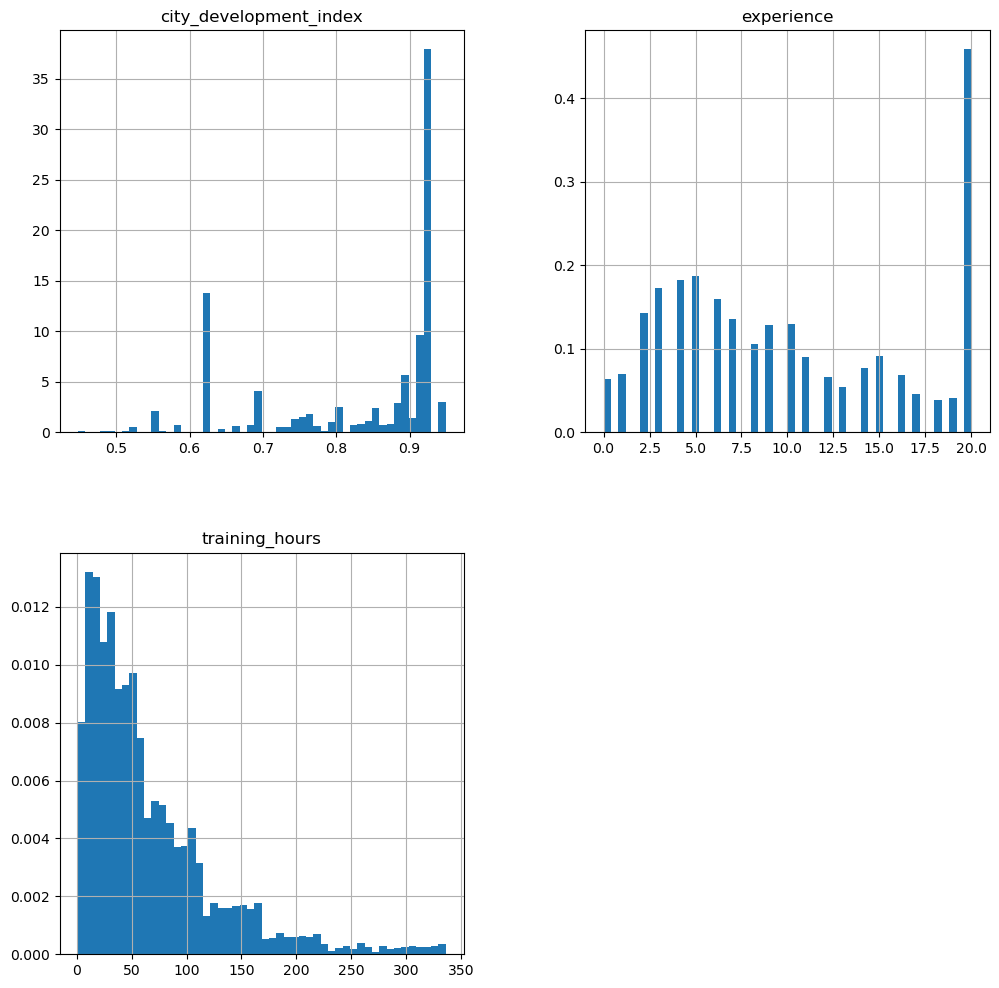

In [20]:
new_df.hist(bins = 50, density=True, figsize=(12,12))
plt.show()

<Axes: >

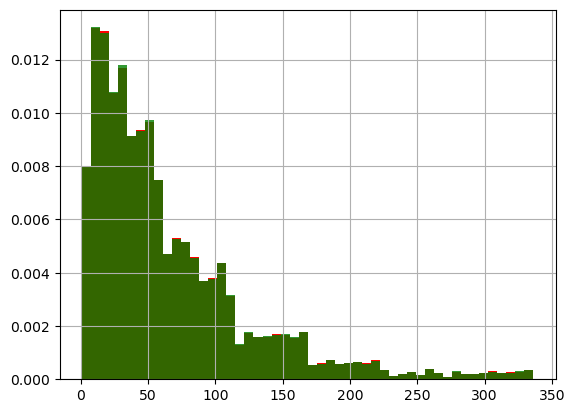

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original dataa
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')

#data after cca,the argument alpha makes the color transparent, so we
# see the overlay of the 2 distribution
new_df['training_hours'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: ylabel='Density'>

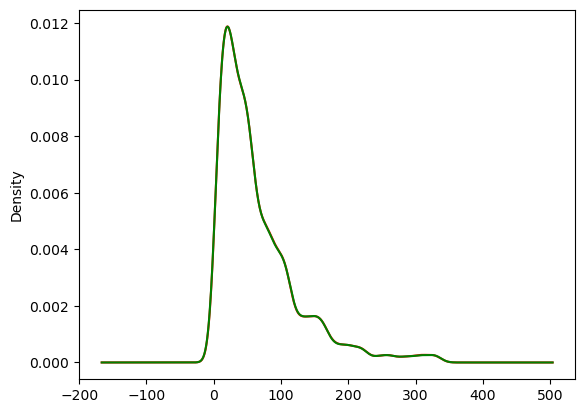

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['training_hours'].plot.density(color='red')

#data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

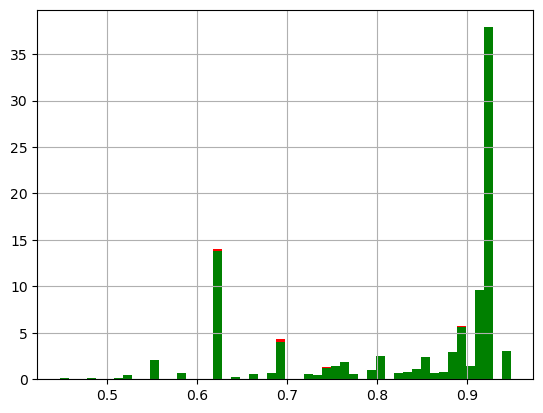

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True,color='red')

new_df['city_development_index'].hist(bins=50, ax=ax, density=True,color='green')

In [25]:
temp = pd.concat([
    # percentage of the observation per category, original data
    df['enrolled_university'].value_counts() / len(df),
    
    # per of the observation per category, cca data
    new_df['enrolled_university'].value_counts() / len(df)
], axis=1)

# add column names
temp.columns = ['original','cca']

temp

,original,cca
no_enrollment,0.721213,0.659359
Full time course,0.196106,0.180029
Part time course,0.062533,0.057469
